<style>
    h1 {
        padding: 8px 8px;
        background-image: linear-gradient(135deg, #c9f3ff, rgb(131, 218, 255));
        font-weight: 700;
        position: static;
        text-align: center;
        color: #006098;
        font-size: 36px;
    }
    h2 {
        font-weight: 700;
        text-align: center;
        font-style: italic;
        font-size: 24px;
    }
</style>

<div><h1>THỐNG KÊ MÁY TÍNH VÀ ỨNG DỤNG</h1></div>
<div><h2>Bài tập 04</h2></div>

**THÔNG TIN CÁ NHÂN**

- _Họ tên sinh viên:_ **Nguyễn Đặng Đăng Khoa**

- _Mã số sinh viên:_ **21120179**

**KHAI BÁO THƯ VIỆN**

In [2]:
import numpy as np
import pandas as pd
import math
# import numpy.matlib as npm # Create matrix from numpy

import random as rd
import numpy.random as nrd
import collections as clt
import time

from scipy import stats
import statsmodels.api as sm

import matplotlib.pyplot as plt
plt.rcParams['figure.dpi'] = 320
import seaborn as sns

from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from scipy.stats import linregress
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVR
from sklearn.metrics import r2_score, mean_squared_error
from sklearn.decomposition import PCA

<frozen importlib._bootstrap>:241: RuntimeWarning: scipy._lib.messagestream.MessageStream size changed, may indicate binary incompatibility. Expected 56 from C header, got 64 from PyObject


# **CÂU 1**
Dữ liệu của 3 đại lượng $X$, $Y$, $Z$ được cho trong bảng sau:
|  $X$  |  $Y$  |  $Z$  |
|:-----:|:-----:|:-----:|
|  0.55 |  1.85 | 12.80 |
|  0.72 |  0.14 | 15.19 |
|  0.60 |  0.17 | 14.68 |
|  0.54 |  0.04 | 14.57 |
|  0.42 |  1.67 | 12.46 |
|  0.65 |  1.56 | 13.49 |
|  0.44 |  1.74 | 12.47 |
|  0.89 |  1.96 | 14.05 |
|  0.96 |  1.60 | 14.69 |
|  0.38 |  0.92 | 13.05 |
|  0.79 |  1.56 | 14.05 |
|  0.53 |  0.24 | 14.33 |
|  0.57 |  1.28 | 13.45 |

In [3]:
c1_df = pd.DataFrame({'X':[0.55, 0.72, 0.60, 0.54, 0.42, 0.65, 0.44, 0.89, 0.96, 0.38, 0.79, 0.53, 0.57],
                      'Y':[1.85, 0.14, 0.17, 0.04, 1.67, 1.56, 1.74, 1.96, 1.60, 0.92, 1.56, 0.24, 1.28],
                      'Z':[12.80, 15.19, 14.68, 14.57, 12.46, 13.49, 12.47, 14.05, 14.69, 13.05, 14.05, 14.33, 13.45]})
c1_df

,X,Y,Z
0,0.55,1.85,12.80
1,0.72,0.14,15.19
2,0.60,0.17,14.68
3,0.54,0.04,14.57
4,0.42,1.67,12.46
5,0.65,1.56,13.49
6,0.44,1.74,12.47
7,0.89,1.96,14.05
8,0.96,1.60,14.69
9,0.38,0.92,13.05


## **Phần I**

### **_Tính hệ số tương quan mẫu giữa $X$ và $Z$._**

#### _Nền tảng toán học_

##### Phương sai (Variance) và Độ lệch chuẩn (Standard deviation)

**Độ lệch chuẩn**: Khoảng cách trung bình của các điểm dữ liệu đến điểm trung tâm (thường sẽ tính giá trị trung bình `mean`, ngoài ra có thể tính bằng giá trị trung vị `median`).

$\displaystyle s = \sqrt{\frac{\sum_{i=1}^{n}{X_i-\overline{X}}}{n-1}}$

**Phương sai**: là một cách khác để đo độ lệch dữ liệu.

$\displaystyle var = s^2 = \frac{\sum_{i=1}^{n}{X_i-\overline{X}}}{n-1}$

##### Hiệp phương sai (Covariance) và Ma trận hiệp phương sai (Covariance matrix)

**Hiệp phương sai**: Xem xét sự thay đổi của chiều dữ liệu $X$ và $Y$ với nhau.

$\displaystyle cov(X,Y) = \frac{\sum_{i=1}^{n}{(X_i-\overline{X})(Y_i-\overline{Y})}}{n-1}$

Nếu:
- $cov(X,Y) > 0 \Rightarrow$ Khi $X$ tăng thì $Y$ tăng;
- $cov(X,Y) < 0 \Rightarrow$ Khi $X$ tăng thì $Y$ giảm;
- $cov(X,Y) = 0 \Rightarrow$ $X$ và $Y$ là những thuộc tính độc lập nhau.

**Ma trận hiệp phương sai**: Giả sử tập dữ liệu có các chiều là $X_1, X_2, \dots, X_k$, với $k \in \mathbb{N}^*$, thì ta có:

$\displaystyle cov(X_1, X_2, \dots, X_k)=
\begin{pmatrix}
cov(X_1,X_1) & cov(X_1,X_2) & \dots & cov(X_1,X_k)\\
cov(X_2,X_1) & cov(X_2,X_2) & \dots & cov(X_2,X_k)\\
\vdots & \vdots & \ddots & \vdots\\
cov(X_k,X_1) & cov(X_k,X_2) & \dots & cov(X_k,X_k)\\
\end{pmatrix}$

Ma trận hiệp phương sai của dữ liệu:

In [3]:
# Cài đặt hàm sử dụng cho cả ma trận được lưu trong DataFrame hoặc mảng 2 chiều
def cal_covariance_matrix(X, ddof:np.uint64=1):
    def cal_covariance(x, y):
        return np.sum(np.dot(x - x.mean(), y - y.mean()))/(x.shape[0] - ddof)*1.
    
    _X_np = X
    if isinstance(X, (pd.Series, pd.DataFrame)):
        _X_np = _X_np.to_numpy()
        
    # Cách 1
    _cov_mtr = np.zeros((_X_np.shape[1], _X_np.shape[1]))
    for _i in range(X.shape[1]):
        for _j in range(X.shape[1]):
            _cov_mtr[_i,_j] = _cov_mtr[_j,_i] = cal_covariance(_X_np[:,_i], _X_np[:,_j])
            if _i == _j:
                break        
    return _cov_mtr

pd.DataFrame(cal_covariance_matrix(c1_df, 1), index=c1_df.columns, columns=c1_df.columns)

,X,Y,Z
X,0.031714,0.027680,0.099176
Y,0.027680,0.534173,-0.423453
Z,0.099176,-0.423453,0.820158


In [4]:
# Ngoài ra, dữ liệu lưu bằng DataFrame còn có hàm hỗ trợ tính ma trận hiệp phương sai
cov_matrix = c1_df.cov(ddof=1)
cov_matrix

,X,Y,Z
X,0.031714,0.027680,0.099176
Y,0.027680,0.534173,-0.423453
Z,0.099176,-0.423453,0.820158


##### Ma trận tương quan (Correlation matrix)

**Ma trận tương quan**: Cách biểu diễn khác của ma trận hiệp phương sai thông qua tính toán phương sai trên bộ dữ liệu đã được chuẩn hóa.

In [5]:
# Chuẩn hóa dữ liệu
def normalize(X, ddof:np.uint64=1):
    _mean = np.mean(X, axis=0)
    _std = np.std(X, axis=0, ddof=ddof)
    _std_filled = _std.copy()
    _std_filled[(_std==0.0) | (_std==np.NaN)] = 1.
    return np.divide(np.subtract(X, _mean), _std_filled), _mean, _std_filled

In [6]:
normalized_df = normalize(c1_df, 1)[0]
normalized_df

,X,Y,Z
0,-0.384433,0.980915,-1.094016
1,0.570170,-1.358757,1.545043
2,-0.103667,-1.317710,0.981897
3,-0.440586,-1.495580,0.860434
4,-1.114423,0.734634,-1.469447
5,0.177098,0.584129,-0.332112
6,-1.002117,0.830410,-1.458405
7,1.524773,1.131421,0.286245
8,1.917845,0.638858,0.992939
9,-1.339036,-0.291538,-0.817964


Dữ liệu được chuẩn hóa sẽ có giá trị trung bình $\mu = 0$ và độ lệch chuẩn $\sigma = 1$. Khi đó:

$\begin{matrix}
cov(X,Y) & = & \displaystyle \frac{\sum_{i=1}^{n}{(X_i-\overline{X})(Y_i-\overline{Y})}}{n-1}\\\\
& = & \displaystyle \frac{\sum_{i=1}^{n}{(X_i)(Y_i)}}{n-1}\\\\
& = & \displaystyle \frac{XY}{n-1}\\\\
\Rightarrow cov_\mathbf{X} & = & \displaystyle \frac{\mathbf{X}^\top\mathbf{X}}{n-1}\\
\end{matrix}$

In [7]:
# Cài đặt hàm sử dụng cho cả ma trận được lưu trong DataFrame hoặc mảng 2 chiều
def cal_covariance_matrix(X, ddof:np.uint64=1):
    _X_np = X
    if isinstance(X, (pd.Series, pd.DataFrame)):
        _X_np = _X_np.to_numpy()
    
    # Cách 2
    _cov_mtr = np.divide(np.dot(_X_np.T, _X_np), (_X_np.shape[0] - ddof)*1.0)
    return _cov_mtr

cal_covariance_matrix(normalized_df.to_numpy(), 1)
pd.DataFrame(cal_covariance_matrix(normalized_df.to_numpy(), 1), index=c1_df.columns, columns=c1_df.columns)

,X,Y,Z
X,1.000000,0.212667,0.614940
Y,0.212667,1.000000,-0.639757
Z,0.614940,-0.639757,1.000000


In [8]:
# Ngoài ra, dữ liệu lưu bằng DataFrame còn có hàm hỗ trợ tính ma trận tương quan mà không cần phải chuẩn hóa dữ liệu
corr_matrix = c1_df.corr()
corr_matrix

,X,Y,Z
X,1.000000,0.212667,0.614940
Y,0.212667,1.000000,-0.639757
Z,0.614940,-0.639757,1.000000


#### _Vậy hệ số tương quan mẫu của $X$ và $Z$ là:_

In [9]:
corr_matrix.loc['X', 'Z']

0.6149402624325707

### **_Kiểm định  giả  thuyết “$X$ và $𝑍$ có tương quan” bằng kiểm định hệ số tương quan_**

Gọi:
- $H_0$: Không có sự tương quan giữa $X$ và $Z$.
- $H_1$: Có sự tương quan giữa $X$ và $Z$.

Đầu tiên, quan sắt bằng cách trực quan các điểm dữ liệu trên biểu đồ scatter.

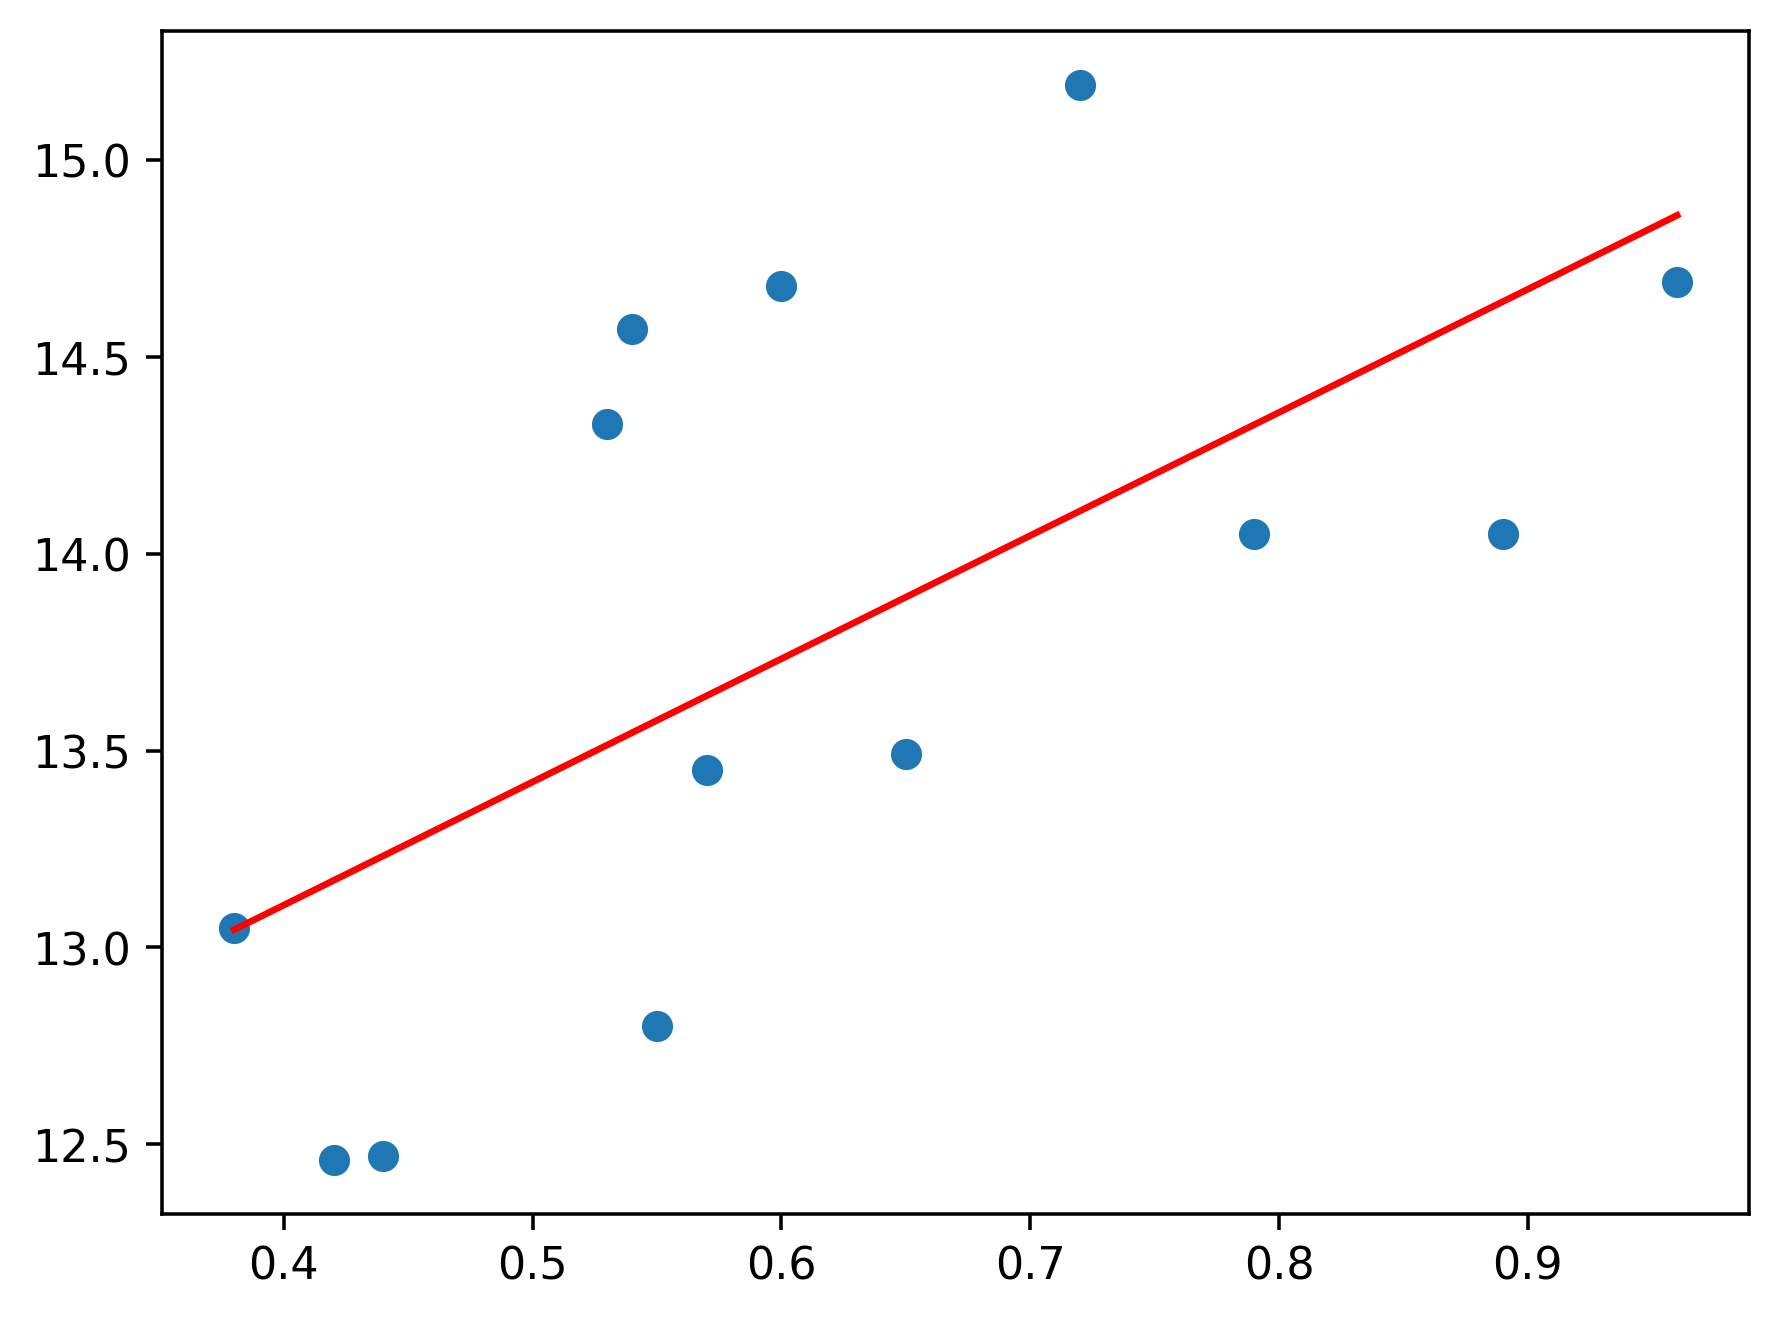

In [10]:
X = c1_df['X']
Y = c1_df['Z']
results = sm.OLS(Y,sm.add_constant(X)).fit()

# print(results.summary())

plt.scatter(X,Y)
X_plot = np.linspace(X.min(),X.max(),100);
plt.plot(X_plot, X_plot * results.params[1] + results.params[0], color='red');

Quan sát bằng mắt, ta thấy dường như chúng có sự tương quan khá cao, khi X tăng thì Z cũng tăng.

Giờ sẽ kiểm chứng bằng Kiểm định giả thiết không (Null hypothesis).

In [11]:
corr_val, p_value = stats.pearsonr(c1_df['X'], c1_df['Z'], alternative='greater')
print(f"Kết quả kiểm định:\nStatistic = {corr_val}\np-value = {p_value}\n")

threshold_alpha = 0.95
print("Vậy ta bác bỏ giả thuyết H₀ để kết luận có sự tương quan giữa X và Z.") if p_value < 1 - threshold_alpha \
    else print("Không đủ cơ sở để kết luận có sự tương quan giữa X và Z.")

Kết quả kiểm định:
Statistic = 0.6149402624325707
p-value = 0.012651197598909668

Vậy ta bác bỏ giả thuyết H₀ để kết luận có sự tương quan giữa X và Z.


### **_Dùng kĩ thuật lấy mẫu lại hoán vị, kiểm định giả thuyết “$X$ và $Z$ có tương quan” và so sánh kết quả với câu b_**

In [12]:
def rand_perm (x1 , x2, alternative:str='two-sided'):
    inds_1 = np.arange(len(x1))
    np.random.shuffle(inds_1)
    inds_2 = np.copy(inds_1)
    np.random.shuffle(inds_2)
    
    x_corr, x_pvalue = stats.pearsonr(x1[inds_1], x2[inds_2], alternative=alternative)
    return x_corr, x_pvalue

In [13]:
N = 20000
samples = np.fromiter((rand_perm(X, Y)[0] for _ in range (N)), "float")

In [14]:
lower_corr = np.mean(samples < corr_val) * 100

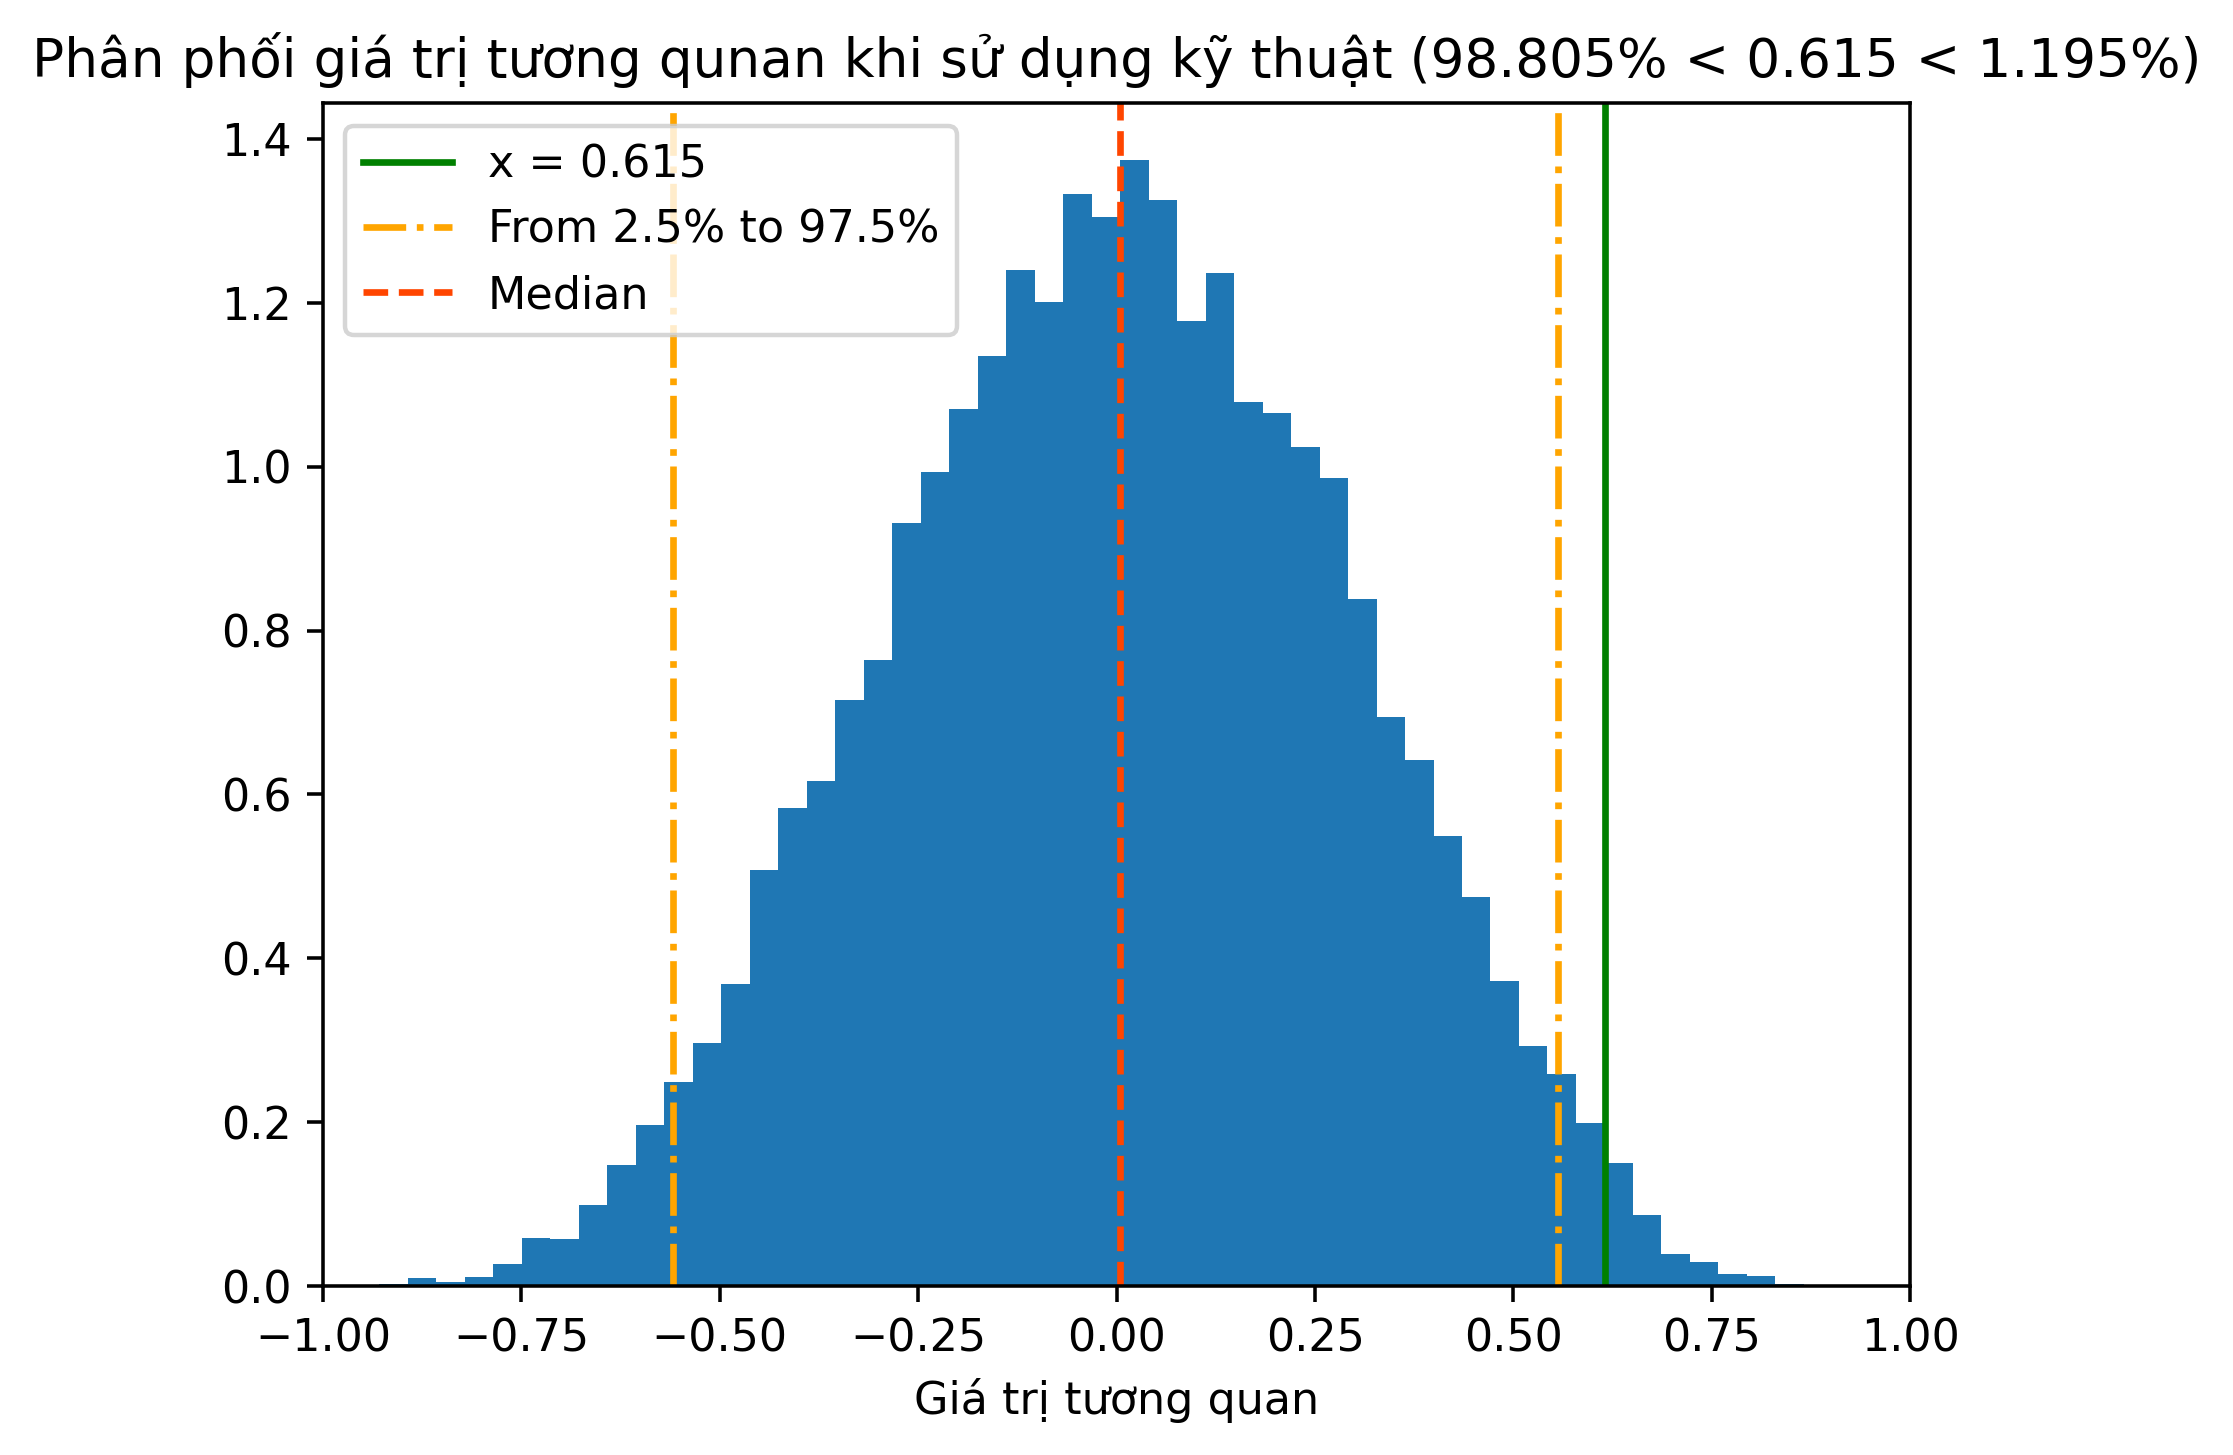

In [16]:
plt.figure(dpi=320)
plt.hist(samples, 50, density=True);
plt.axvline(corr_val, label=f'x = {round(corr_val, 3)}', color='green');
# plt.axhline(10, np.quantile(samples, 0.05)+min(samples), np.quantile(samples, 0.95)-min(samples), color='orangered');
plt.axvline(np.quantile(samples, 0.025), label='From 2.5% to 97.5%', linestyle='dashdot', color='orange');
plt.axvline(np.quantile(samples, 0.975), linestyle='dashdot', color='orange');
plt.axvline(np.quantile(samples, 0.5), label='Median', linestyle='--', color='orangered');
plt.title(f"Phân phối giá trị tương qunan khi sử dụng kỹ thuật ({lower_corr:.3f}% < {corr_val:.3f} < {(100 - lower_corr):.3f}%)")
plt.legend()

plt.xlim([-1, 1]);
plt.xlabel('Giá trị tương quan');

Ta thấy rằng giá trị tương quan của $X$ và $Z$ tìm được ở câu trước chỉ phản ánh sự tương quan cho cặp giá trị của $X$ và $Z$ theo đề, bởi giá trị tương quan nằm ngoài khoảng tin cậy $95\%$. Khoảng tin cậy $95\%$ cho thấy rằng $X$ và $Z$ có sự tương quan yếu hoặc không có sự tương quan. Và cũng từ biểu đồ trên, ta có cơ sở kết luận rằng, cặp $X$ và $Z$ theo đề có sự tương quan.

## **Phần II**
Xét mô hình hồi qui tuyến tính:

$$\displaystyle Z = aX + bY + c + \epsilon$$

### **_Ước lượng các hệ số hồi qui $a$, $b$ và $c$._**

In [16]:
model = LinearRegression()
model.fit(c1_df[['X', 'Y']], c1_df['Z'])

a = model.coef_[0]  # Hệ số hồi quy cho biến X
b = model.coef_[1]  # Hệ số hồi quy cho biến Y
c = model.intercept_  # Hằng số c

print(f"Hệ số hồi quy a: {a:.3f}")
print(f"Hệ số hồi quy b: {b:.3f}")
print(f"Hằng số c: {c:.3f}")

Hệ số hồi quy a: 4.000
Hệ số hồi quy b: -1.000
Hằng số c: 12.450


### **_Dùng kĩ thuật bootstrapping, xây dựng khoảng tin cậy $95\%$ cho $a$, $b$ và $c$._**

In [17]:
# Xây dựng khoảng tin cậy bằng Bootstrap
n_iter = 1000  # Số lần lặp Bootstrap

a_boot = []
b_boot = []
c_boot = []

for _ in range(n_iter):
    X_boot = c1_df['X'].sample(c1_df.shape[0], replace=True)
    Y_boot = c1_df['Y'].sample(c1_df.shape[0], replace=True)

    model_boot = LinearRegression()
    model_boot.fit(np.column_stack((X_boot, Y_boot)), c1_df['Z'])

    a_boot.append(model_boot.coef_[0])
    b_boot.append(model_boot.coef_[1])
    c_boot.append(model_boot.intercept_)

a_percentiles = np.percentile(a_boot, [2.5, 97.5])
b_percentiles = np.percentile(b_boot, [2.5, 97.5])
c_percentiles = np.percentile(c_boot, [2.5, 97.5])

# In kết quả
print(f"Khoảng tin cậy 95% cho a: [{a_percentiles[0]:.3f}, {a_percentiles[1]:.3f}]")
print(f"Khoảng tin cậy 95% cho b: [{b_percentiles[0]:.3f}, {b_percentiles[1]:.3f}]")
print(f"Khoảng tin cậy 95% cho c: [{c_percentiles[0]:.3f}, {c_percentiles[1]:.3f}]")


Khoảng tin cậy 95% cho a: [-3.395, 3.072]
Khoảng tin cậy 95% cho b: [-0.795, 0.737]
Khoảng tin cậy 95% cho c: [11.692, 16.014]


Khi sử dụng kỹ thuật bootstrap, ta thấy các giá trị tham số $a$ và $b$ đang gặp phải vấn đề overfitting với bộ dữ liệu, khi độ nhiễu dần tăng lên thì khả năng cho kết quả MSE trở nên tệ hơn.

### **_Giả sử ta dùng mô hình hồi qui trên để dự đoán giá trị cho $Z$ là $z_0$ tại $x_0 = 0.5$, $y_0 = 1$. Dùng kĩ thuật bootstrapping, ước lượng sai số dự đoán và xây dựng khoảng tin cậy $95\%$ cho $z_0$._**

In [18]:
# Giá trị dự đoán
x_0 = 0.5
y_0 = 1

# Khởi tạo danh sách lưu trữ giá trị dự đoán
z_0_boot = []

n_iter = 1000  # Số lần lặp Bootstrap

for _ in range(n_iter):
    # Lấy mẫu ngẫu nhiên có thay thế
    X_boot = c1_df['X'].sample(c1_df.shape[0], replace=True)
    Y_boot = c1_df['Y'].sample(c1_df.shape[0], replace=True)

    # Huấn luyện mô hình Bootstrap
    model_boot = LinearRegression()
    model_boot.fit(np.column_stack((X_boot, Y_boot)), c1_df['Z'])

    # Dự đoán z_0
    z_0_pred = model_boot.coef_[0] * x_0 + model_boot.coef_[1] * y_0 + model_boot.intercept_
    z_0_boot.append(z_0_pred)

# Tính toán sai số dự đoán và khoảng tin cậy
z_0 = a * x_0 + b * y_0 + c  # Giá trị thực tế của Z0
mean_error = np.mean(np.power(z_0_boot - z_0, 2))/(len(z_0_boot)**0.5)
z_0_boot.sort()
z_0_lower = np.percentile(z_0_boot, 2.5)
z_0_upper = np.percentile(z_0_boot, 97.5)

print(f"Ước lượng sai số: {mean_error:.3f}")
print(f"Dự đoán giá trị z_0: {np.mean(z_0):.3f}")
print(f"Khoảng tin cậy 95% cho z_0: [{z_0_lower:.3f}, {z_0_upper:.3f}]")

Ước lượng sai số: 0.005
Dự đoán giá trị z_0: 13.450
Khoảng tin cậy 95% cho z_0: [13.333, 14.233]


# **CÂU 2**
Nếu $X$ có phân phối Poisson với tham số $\lambda > 0$ thì $X$ có kì vọng và phương sai đều là $\lambda$, còn yếu vị (mode) xấp xỉ $\displaystyle \lambda - \frac{1}{2}$. Từ đó, khi có mẫu dữ liệu của $X$ ta có thể dùng các ước lượng sau để ước lượng $\lambda$:

$$ \displaystyle T_1 = \overline{X} , T_2 = S^2, T_3 = \hat{m} + \displaystyle\frac{1}{2}$$

với $\overline{X},S^2,\hat{m}$ lần lượt là trung bình, phương sai và yếu vị mẫu.

Bảng sau đây là một mẫu dữ liệu cỡ $n=40$ sinh từ phân phối Poissson với tham số $\lambda$.
```
4 3 3 1 5 4 0 2 3 3
5 3 6 2 1 3 5 2 5 2
6 3 3 6 6 3 3 4 3 2
2 1 6 4 2 4 3 5 4 2
```

In [19]:
data = np.array([4,3,3,1,5,4,0,2,3,3,
                 5,3,6,2,1,3,5,2,5,2,
                 6,3,3,6,6,3,3,4,3,2,
                 2,1,6,4,2,4,3,5,4,2])

## **Tính các giá trị ước lượng $T_1,T_2,T_3$ cho $\lambda$ từ mẫu dữ liệu đã cho.**

In [20]:
T1 = data.mean()
T2 = data.var()
T3 = stats.mode(data)[0]+0.5
print(f"Ước lượng giá trị T_1: {T1}")
print(f"Ước lượng giá trị T_2: {T2}")
print(f"Ước lượng giá trị T_3: {T3}")

Ước lượng giá trị T_1: 3.35
Ước lượng giá trị T_2: 2.3775
Ước lượng giá trị T_3: 3.5


## **Dùng kĩ thuật bootstrapping, so sánh sai số chuẩn của các ước lượng trên.**

In [21]:
def bootstrap_ci(data, B, statistic, alpha=0.05):
    n = len(data)
    estimates = []  # Lưu trữ các giá trị ước tính từ mỗi lần lấy mẫu

    for _ in range(B):
        # Lấy mẫu bootstrap với thay thế
        sample = data[np.random.choice(n, size=n, replace=True)]
        # Tính toán thống kê cho mẫu bootstrap
        estimate = statistic(sample)
        estimates.append(estimate)

    # Sắp xếp các giá trị ước tính
    estimates.sort()

    # Tính toán khoảng tin cậy
    ci_ = np.quantile(estimates, [alpha/2, 1-alpha/2])

    return np.mean(estimates), np.std(estimates)/(n**0.5), ci_

Tính sai số chuẩn từ ước lượng được tính bằng chính kỹ thuật bootstrap.

In [22]:
# Số lần lấy mẫu bootstrap
B = 10000

# Tính toán sai số chuẩn cho từng ước lượng
T1_mean, T1_std_err, T1_ci = bootstrap_ci(data, B, np.mean)
T2_mean, T2_std_err, T2_ci = bootstrap_ci(data, B, np.var)
T3_mean, T3_std_err, T3_ci = bootstrap_ci(data, B, stats.mode)

# Hiển thị kết quả
print("Ước lượng T_1:")
# print(f"  - Trung bình: {T1_mean:.3f}")
print(f"  - Sai số chuẩn: {T1_std_err:.3f}")
# print(f"  - Khoảng tin cậy 95%: [{T1_ci[0]:.3f}, {T1_ci[1]:.3f}]")

print("\nƯớc lượng T_2:")
# print(f"  - Trung bình: {T2_mean:.3f}")
print(f"  - Sai số chuẩn: {T2_std_err:.3f}")
# print(f"  - Khoảng tin cậy 95%: [{T2_ci[0]:.3f}, {T2_ci[1]:.3f}]")

print("\nƯớc lượng T_3:")
# print(f"  - Trung bình: {T3_mean:.3f}")
print(f"  - Sai số chuẩn: {T3_std_err:.3f}")
# print(f"  - Khoảng tin cậy 95%: [{T3_ci[0]:.3f}, {T3_ci[1]:.3f}]")

Ước lượng T_1:
  - Sai số chuẩn: 0.039

Ước lượng T_2:
  - Sai số chuẩn: 0.069

Ước lượng T_3:
  - Sai số chuẩn: 0.813


Tính sai số chuẩn từ mẫu tạo bằng phương pháp bootstrap so với ước lượng được tính ở câu trước đó.

In [23]:
def bootstrap_statistic(data, B, statistic):
    n = len(data)
    estimates = []  # Lưu trữ các giá trị ước tính từ mỗi lần lấy mẫu

    for _ in range(B):
        # Lấy mẫu bootstrap với thay thế
        sample = data[np.random.choice(n, size=n, replace=True)]
        # Tính toán thống kê cho mẫu bootstrap
        estimate = statistic(sample)
        estimates.append(estimate)

    # Sắp xếp các giá trị ước tính
    estimates.sort()
    
    return estimates

In [24]:
# Số lần lấy mẫu bootstrap
B = 1000

# Tính toán sai số chuẩn cho từng ước lượng
T1_estimate = bootstrap_statistic(data, B, np.mean)
T2_estimate = bootstrap_statistic(data, B, np.var)
T3_estimate = bootstrap_statistic(data, B, stats.mode)

se_T1 = np.std(np.subtract(T1_estimate, T1))/(len(T1_estimate)**.5)
se_T2 = np.std(np.subtract(T2_estimate, T2))/(len(T2_estimate)**.5)
se_T3 = np.std(np.subtract(T3_estimate, T3))/(len(T3_estimate)**.5)

print(f"Sai số chuẩn của ước lượng T_1: {se_T1:.3f}")
print(f"Sai số chuẩn của ước lượng T_2: {se_T2:.3f}")
print(f"Sai số chuẩn của ước lượng T_3: {se_T3:.3f}")

Sai số chuẩn của ước lượng T_1: 0.008
Sai số chuẩn của ước lượng T_2: 0.013
Sai số chuẩn của ước lượng T_3: 0.164


Dù tính theo phương pháp nào, ta thấy rằng sao số chuẩn tăng dần từ $T_1$ đến $T_3$. Đặc biệt, sai số chuẩn của $T_1$ và $T_2$ khá nhỏ, xấp xỉ dưới $0.1$.

## **Giả sử ta có thêm thông tin là $3≤\lambda≤4$. Dùng kĩ thuật suy diễn Bayes để ước lượng $\lambda$. So sánh sai số của ước lượng này với các ước lượng trên.**

# **CÂU 3**
Từ bộ dữ liệu [California Housing](https://scikit-learn.org/stable/datasets/real_world.html#california-housing-dataset), dùng kĩ thuật kiểm tra chéo, chọn ra mô hình “tốt nhất” giải thích giá nhà `target` theo các đặc trưng `feature`.

In [25]:
from sklearn.datasets import fetch_california_housing

california_housing = fetch_california_housing(as_frame=True)

In [26]:
data_df = california_housing.frame
data_df.sample(5)

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MedHouseVal
5564,3.8372,41.0,5.265957,1.131915,1416.0,3.012766,33.91,-118.29,1.564
16749,3.6588,45.0,4.939940,1.040541,2466.0,3.702703,37.70,-122.47,2.386
8140,3.8162,36.0,5.274406,1.029024,887.0,2.340369,33.82,-118.11,2.219
909,4.9167,34.0,5.963675,1.057692,1276.0,2.726496,37.55,-122.01,2.563
5130,1.3801,39.0,3.617544,1.031579,1933.0,3.391228,33.98,-118.27,0.970


In [27]:
feature_cols = california_housing.feature_names
target_cols = california_housing.target_names
feature_cols, target_cols

(['MedInc',
  'HouseAge',
  'AveRooms',
  'AveBedrms',
  'Population',
  'AveOccup',
  'Latitude',
  'Longitude'],
 ['MedHouseVal'])

## **Khám phá dữ liệu**

- Kích thước dữ liệu:

In [28]:
data_df.shape

(20640, 9)

- Ý nghĩa của từng cột:
    - `MedInc`: Thu nhập trung bình của các hộ gia đình trong khu vực (block group).
    - `HouseAge`: Tuổi trung bình của căn nhà trong khu vực.
    - `AveRooms`: Số phòng trung bình trên một hộ gia đình trong khu vực.
    - `AveBedrms`: Số phòng ngủ trung bình trên một hộ gia đình trong khu vực.
    - `Population`: Tổng dân số của khu vực.
    - `AveOccup`: Số người trung bình trên một hộ gia đình trong khu vực (mật độ cư trú).
    - `Latitude`: Vĩ độ của khu vực.
    - `Longitude`: Kinh độ của khu vực.

Biến dự đoán là giá trị nhà trung bình ở California, có đơn vị một trăm ngàn đô la ($100,000).

Tập dữ liệu này được lấy từ cuộc điều tra dân số năm 1990 của Hoa Kỳ, mỗi một hàng biểu diễn cho thông tin điều tra dân số của mỗi nhóm khu vực. Nhóm khu vực là đơn vị địa lý nhỏ nhất mà Cục điều tra dân số Hoa Kỳ thực hiện thu thập dữ liệu (một nhóm khu vực thường có dân số từ 600 đến 3,000 người).

Hộ gia đình là một nhóm người sống trong một ngôi nhà. Bởi vì trung bình số phòng và phòng ngủ trong bộ dữ liệu này được cung cấp cho mỗi hộ gia đình, những các cột có thể có giá trị lớn đáng ngạc nhiên đối với các nhóm khối có ít hộ gia đình và nhiều ngôi nhà trống, chẳng hạn như khu nghỉ dưỡng.

- Kiểu dữ liệu và dữ liệu bị thiếu:

In [29]:
data_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   MedInc       20640 non-null  float64
 1   HouseAge     20640 non-null  float64
 2   AveRooms     20640 non-null  float64
 3   AveBedrms    20640 non-null  float64
 4   Population   20640 non-null  float64
 5   AveOccup     20640 non-null  float64
 6   Latitude     20640 non-null  float64
 7   Longitude    20640 non-null  float64
 8   MedHouseVal  20640 non-null  float64
dtypes: float64(9)
memory usage: 1.4 MB


- Các thông số thống kê của từng thuộc tính trong dữ liệu:

In [30]:
data_df.describe()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MedHouseVal
count,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,3.870671,28.639486,5.429000,1.096675,1425.476744,3.070655,35.631861,-119.569704,2.068558
std,1.899822,12.585558,2.474173,0.473911,1132.462122,10.386050,2.135952,2.003532,1.153956
min,0.499900,1.000000,0.846154,0.333333,3.000000,0.692308,32.540000,-124.350000,0.149990
25%,2.563400,18.000000,4.440716,1.006079,787.000000,2.429741,33.930000,-121.800000,1.196000
50%,3.534800,29.000000,5.229129,1.048780,1166.000000,2.818116,34.260000,-118.490000,1.797000
75%,4.743250,37.000000,6.052381,1.099526,1725.000000,3.282261,37.710000,-118.010000,2.647250
max,15.000100,52.000000,141.909091,34.066667,35682.000000,1243.333333,41.950000,-114.310000,5.000010


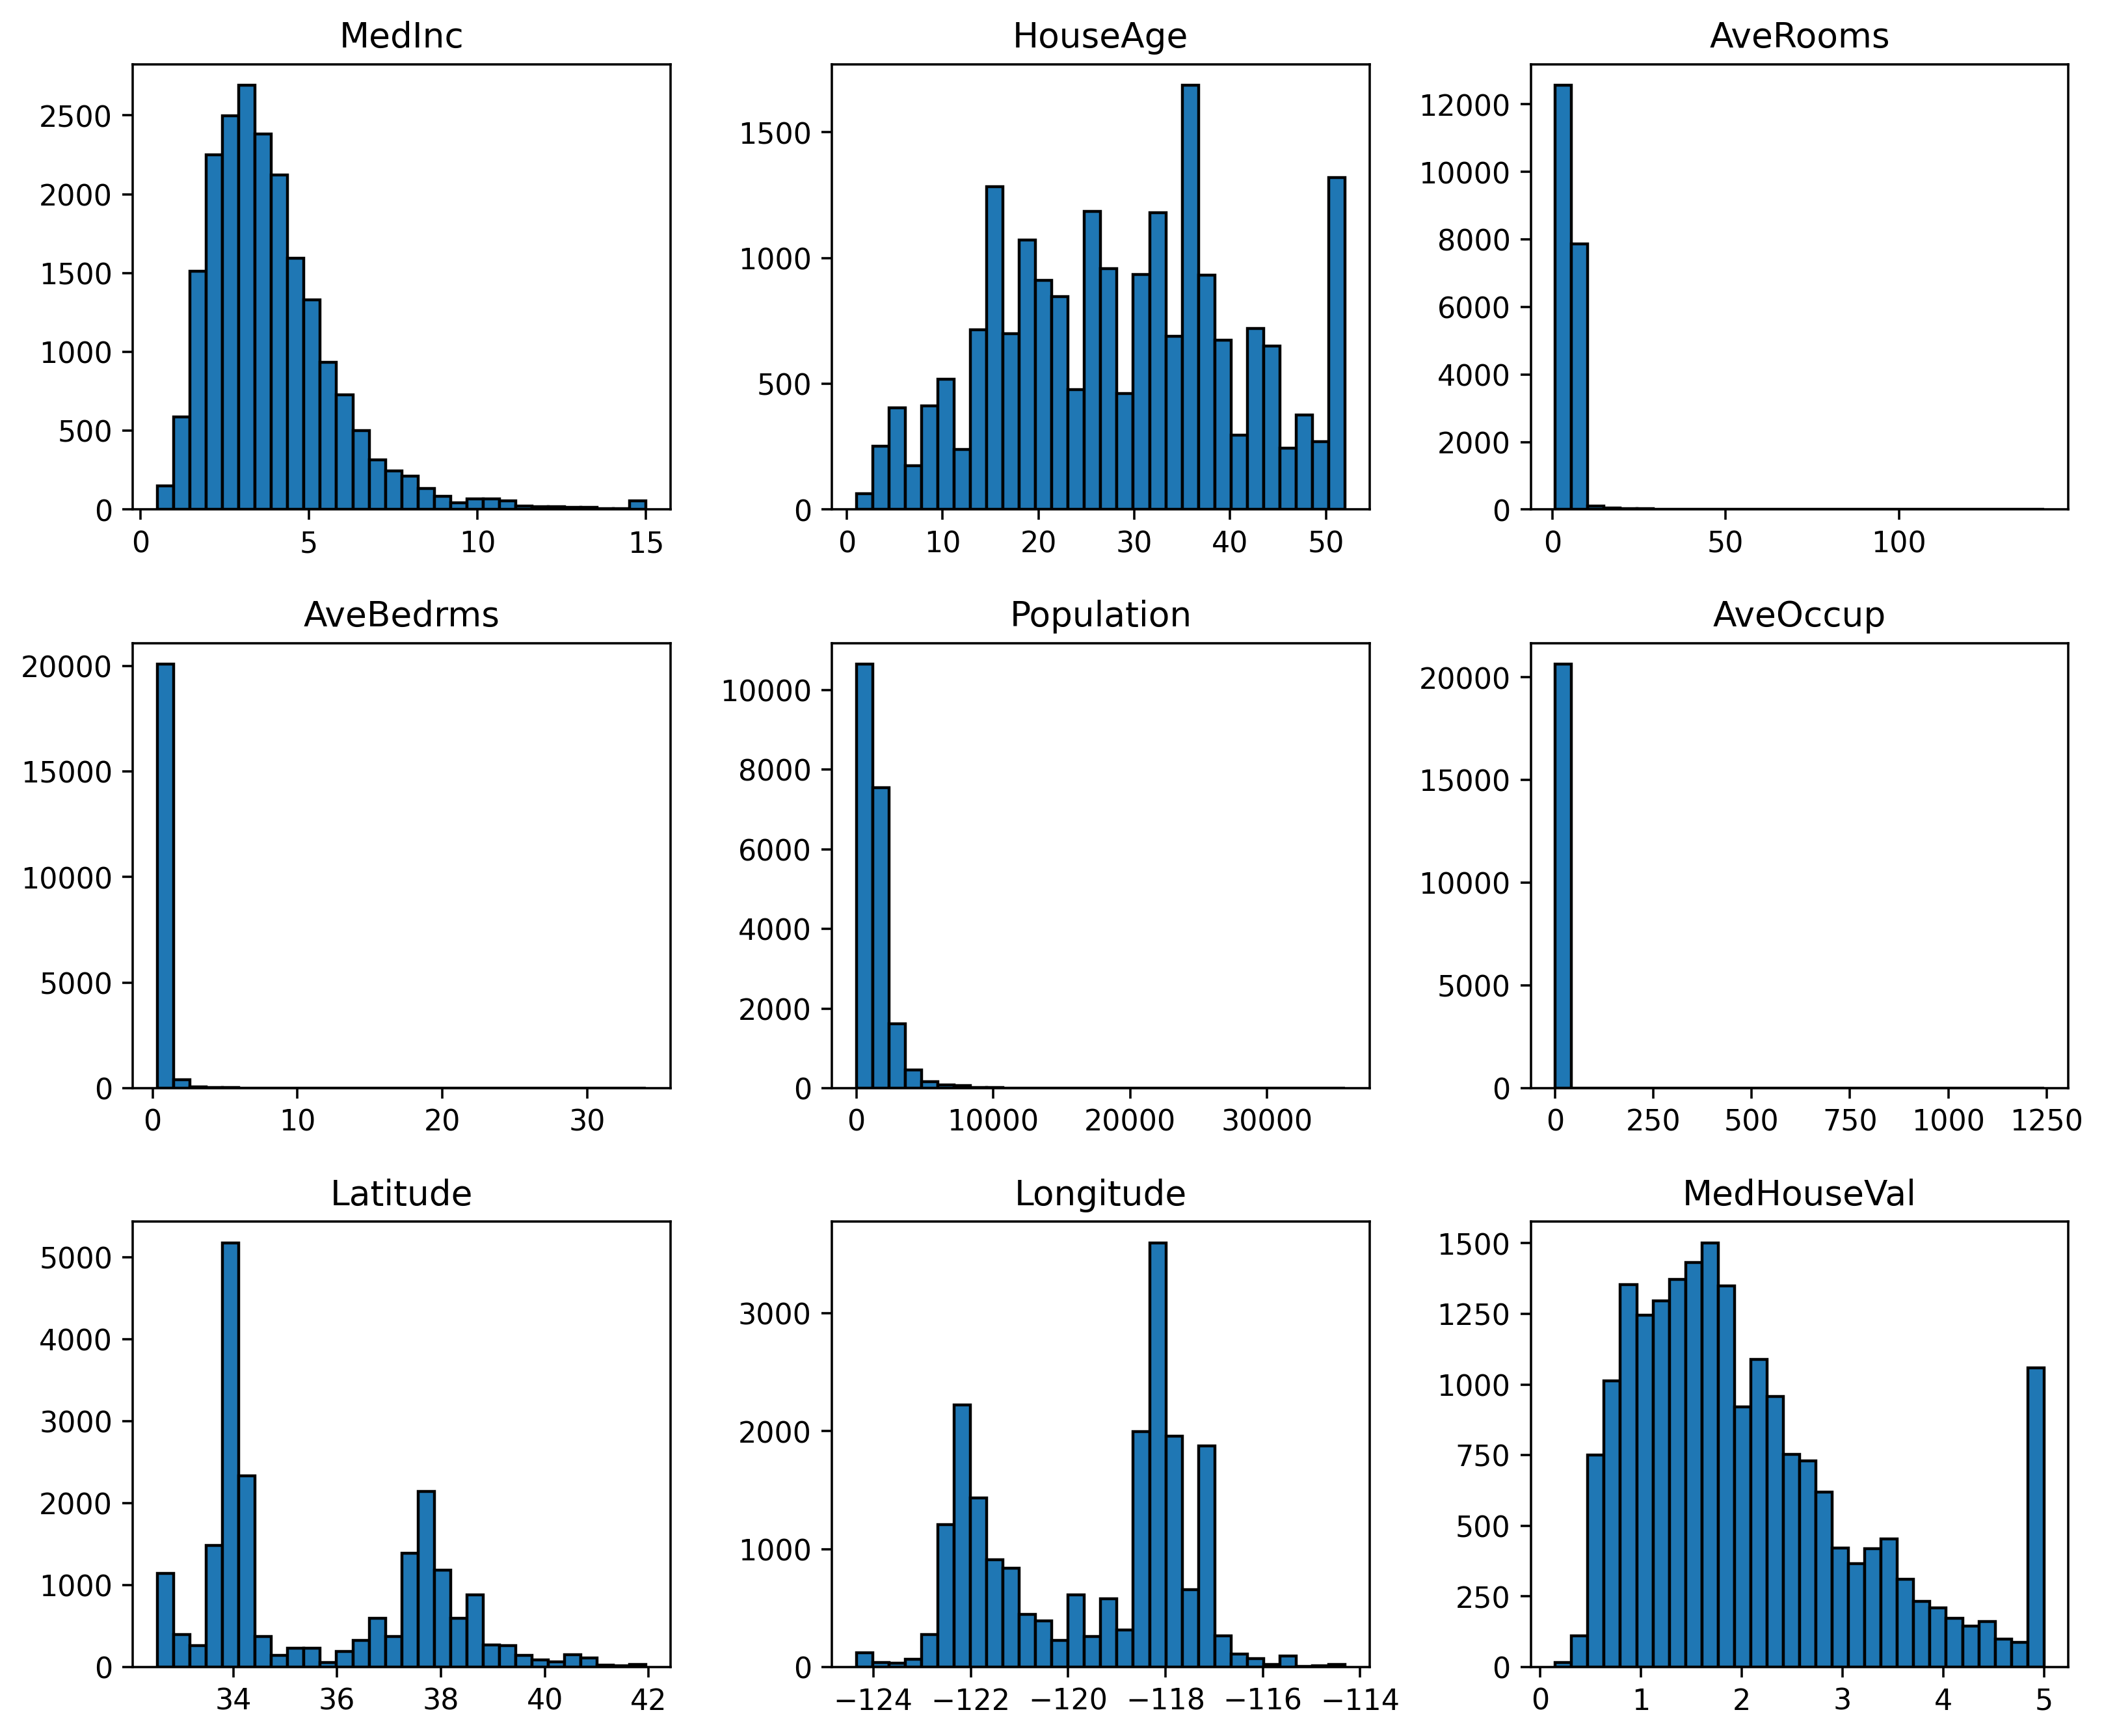

In [31]:
data_df.hist(figsize=(12, 10), bins=30, edgecolor="black", grid=False)
plt.subplots_adjust(hspace=0.3, wspace=0.3)

## **Tìm mô hình phù hợp và tinh chỉnh tham số mô hình bằng Cross Validation**

Đầu tiên, ta chia dữ liệu thành 2 tập dữ liệu: train và test.

In [32]:
X_train, X_test, y_train, y_test = train_test_split(california_housing.data, california_housing.target, test_size=0.2)

Sau khi tìm kiếm nhiều mô hình, đánh giá về độ lỗi cũng như thời gian tinh chỉnh tham số của mô hình, em sẽ sử dụng mô hình SVM cho bài toán hồi quy.

Dữ liệu có những đơn vị tính của mỗi thuộc tính là khác nhau, ta cần chuẩn hóa giá trị được trình bày trên cùng một đơn vị, giúp việc học của mô hình trở nên chính xác hơn. Vì vậy, ta sẽ xây dựng một pipeline xây dựng quá trình học dữ liệu của mô hình.

In [33]:
pipe = Pipeline([
    ('scaler', StandardScaler()),
    ('model', SVR()),
])

Các tham số thường được tinh chỉnh là `kernel`, `gamma` và `C`. Các giá trị phổ biến của các tham số được thiết lập trong `params`. Sử dụng [`GridSearchCV`](https://scikit-learn.org/stable/modules/grid_search.html#multimetric-grid-search) để hỗ trợ thực hiện tinh chỉnh cross-validation với `cv=3`, có nghĩa rằng, tập dữ liệu được chia thành 3 phần, lần lượt mỗi phần được sử dụng làm tập đánh giá và các tập dữ liệu còn lại dùng làm huấn luyện, chúng sẽ xoay vòng cho đến khi tất cả các phần đều được sử dụng làm tập dữ liệu đánh giá.

In [34]:
params = [{'model__kernel': ['linear', 'poly', 'rbf', 'sigmoid'],
           'model__gamma': ['scale', 'auto'],
           'model__C': [0.1, 1.0, 10.0]}]

In [35]:
cv_model = GridSearchCV(pipe,
                        param_grid=params,
                        scoring='neg_mean_squared_error',
                        cv=3);
cv_model.fit(X_train, y_train);
cv_model.best_params_

{'model__C': 10.0, 'model__gamma': 'auto', 'model__kernel': 'rbf'}

In [36]:
print("MSE =",np.abs(cv_model.best_score_))

MSE = 0.32317340394462557


Sau khi sử dụng cross-validation để tinh chỉnh tham số mô hình, ta thiết lập mô hình vừa tìm được và quan sát chúng trên dữ liệu kiểm tra thật (test).

In [37]:
pipe = Pipeline([
    ('scaler', StandardScaler()),
    ('model', SVR(kernel=cv_model.best_params_['model__kernel'],
                  gamma=cv_model.best_params_['model__gamma'],
                  C=cv_model.best_params_['model__C'])),
])

In [38]:
# Fit model
pipe.fit(X_train, y_train)

# Predict
y_pred = pipe.predict(X_test)

In [39]:
r2_score(y_test, y_pred), mean_squared_error(y_test, y_pred)

(0.754046544162487, 0.3142767841450338)

Sau nhiều lần thử nghiệm, mô hình cho kết quả xấp xỉ trong khoảng $(70\%, 80\%)$, với độ lỗi MSE xấp xỉ khoảng $(0.3, 0.4)$.

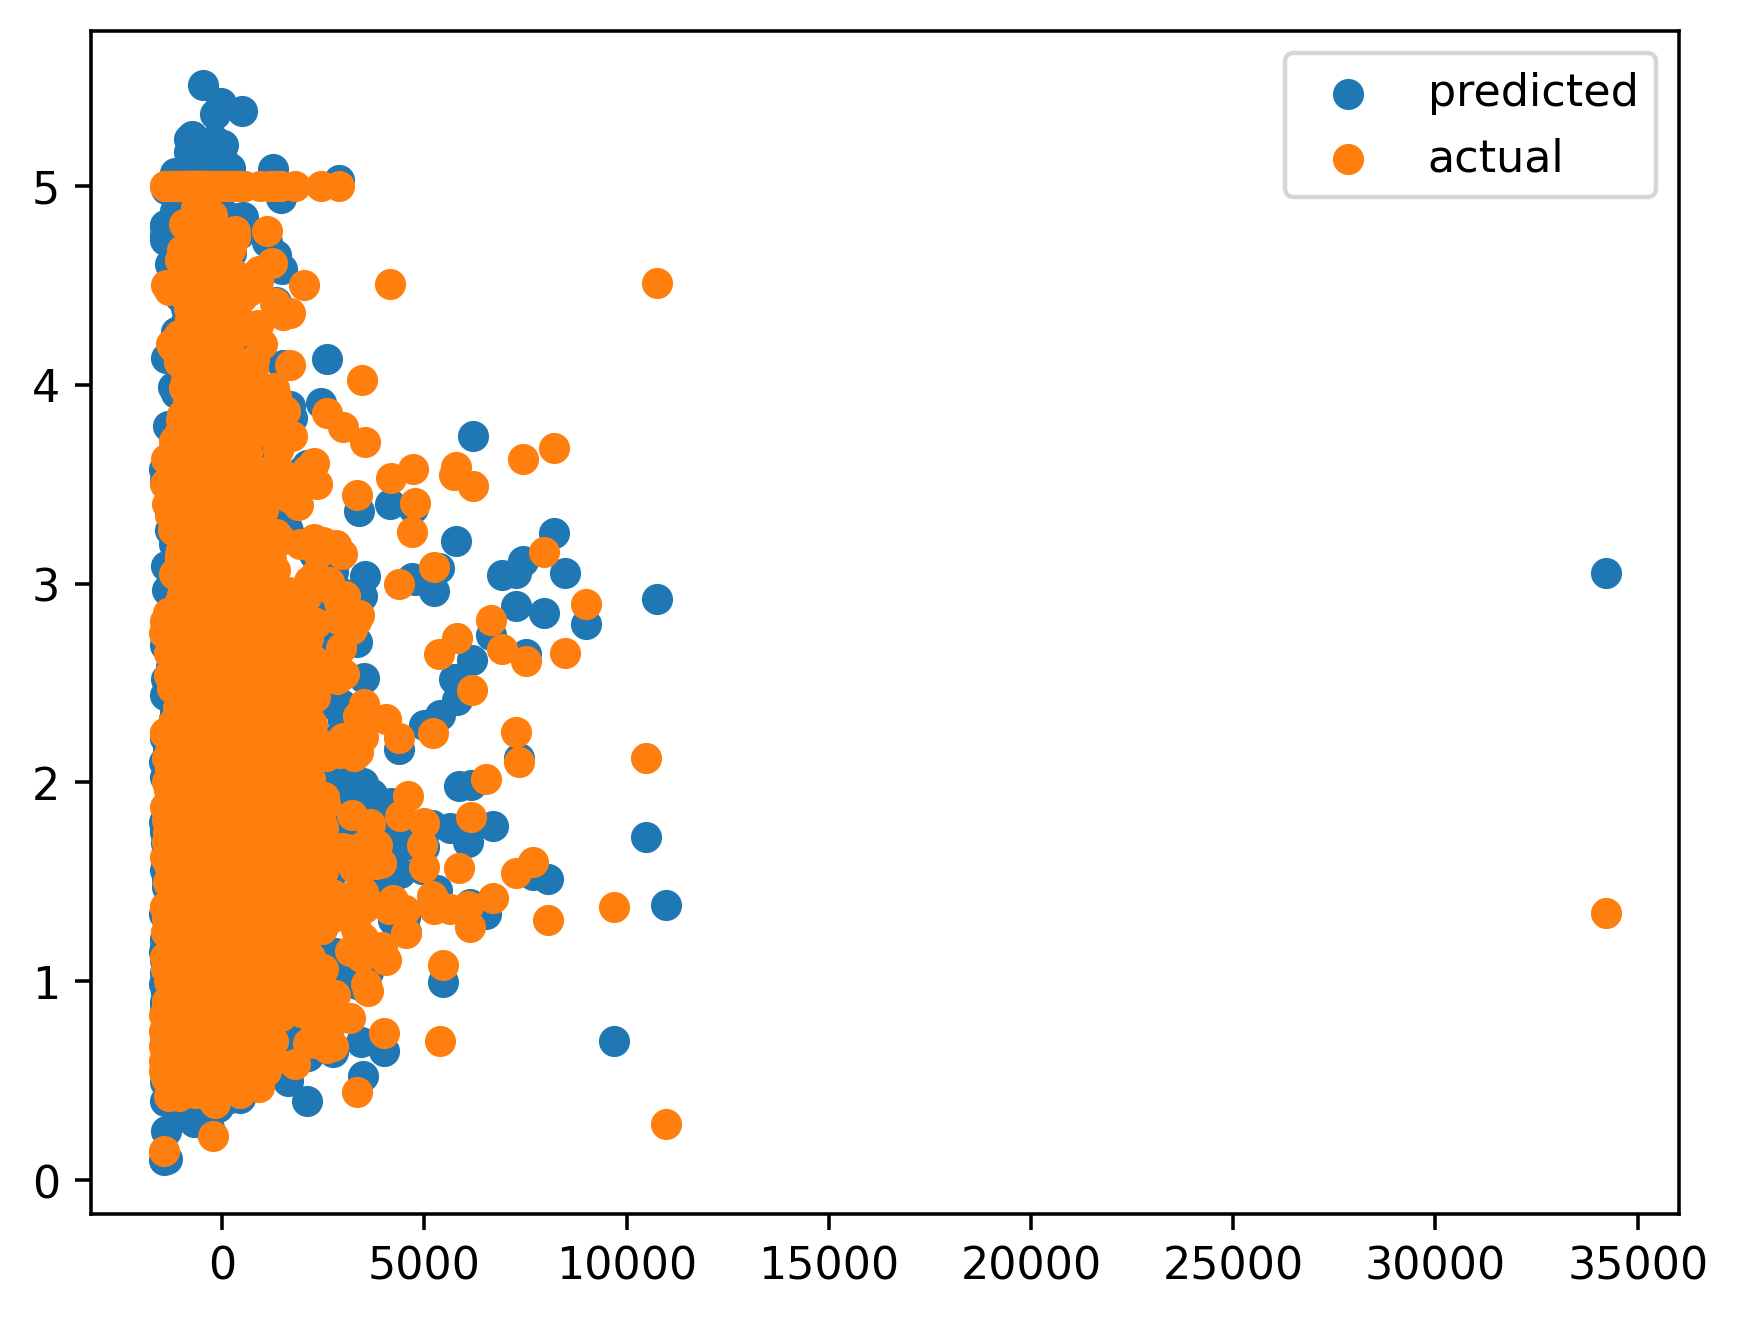

In [40]:
pca = PCA(n_components=1)
X_dv = pca.fit_transform(X_test)[:,0]
plt.scatter(X_dv, y_pred, label='predicted')
plt.scatter(X_dv, y_test, label='actual')
plt.legend()